# Análise das Condições dos Ciclos

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
# Caminhos para os arquivos
profile_path = "profile.txt"
data_folder = "Dados"

# Ler o arquivo de condições
profile_data = pd.read_csv(profile_path, delimiter='\t', header=None)
profile_data.columns = ["Cooler_condition", "Valve_condition", "Pump_leakage", 
                        "Accumulator_pressure", "Stable_flag"]

# Listar arquivos de dados brutos
raw_files = [f for f in os.listdir(data_folder) if f.endswith('.txt')]

print("Condições dos ciclos (profile):")
print(profile_data.head())
print("\nArquivos de dados brutos:")
print(raw_files)

Condições dos ciclos (profile):
   Cooler_condition  Valve_condition  Pump_leakage  Accumulator_pressure  \
0                 3              100             0                   130   
1                 3              100             0                   130   
2                 3              100             0                   130   
3                 3              100             0                   130   
4                 3              100             0                   130   

   Stable_flag  
0            1  
1            1  
2            1  
3            1  
4            1  

Arquivos de dados brutos:
['CE.txt', 'CP.txt', 'EPS1.txt', 'FS1.txt', 'FS2.txt', 'PS1.txt', 'PS2.txt', 'PS3.txt', 'PS4.txt', 'PS5.txt', 'PS6.txt', 'SE.txt', 'TS1.txt', 'TS2.txt', 'TS3.txt', 'TS4.txt', 'VS1.txt']


       Cooler_condition  Valve_condition  Pump_leakage  Accumulator_pressure  \
count       2205.000000      2205.000000   2205.000000           2205.000000   
mean          41.240816        90.693878      0.669388            107.199546   
std           42.383143        10.681802      0.817233             16.435848   
min            3.000000        73.000000      0.000000             90.000000   
25%            3.000000        80.000000      0.000000             90.000000   
50%           20.000000       100.000000      0.000000            100.000000   
75%          100.000000       100.000000      1.000000            130.000000   
max          100.000000       100.000000      2.000000            130.000000   

       Stable_flag  
count  2205.000000  
mean      0.342857  
std       0.474772  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


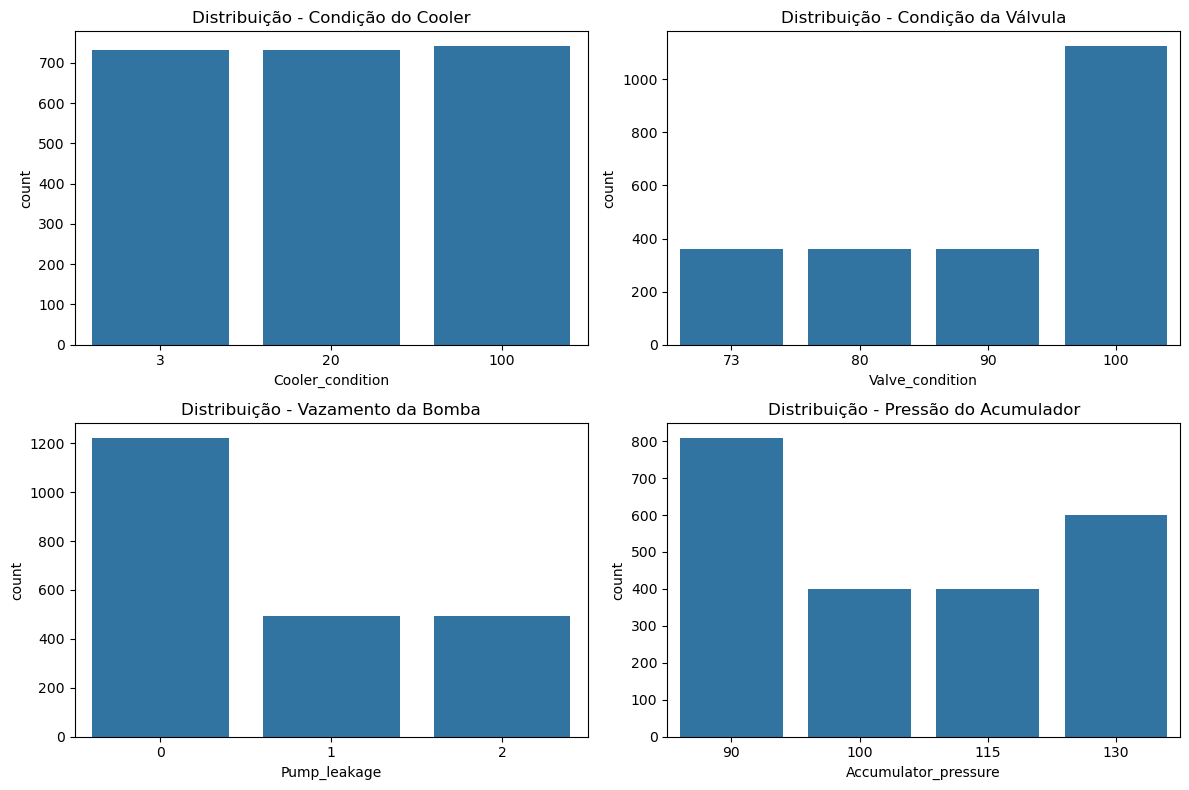

In [14]:
# Estatísticas descritivas
print(profile_data.describe())

# Contagem dos diferentes estados dos componentes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(x=profile_data["Cooler_condition"], ax=axes[0, 0])
axes[0, 0].set_title("Distribuição - Condição do Cooler")

sns.countplot(x=profile_data["Valve_condition"], ax=axes[0, 1])
axes[0, 1].set_title("Distribuição - Condição da Válvula")

sns.countplot(x=profile_data["Pump_leakage"], ax=axes[1, 0])
axes[1, 0].set_title("Distribuição - Vazamento da Bomba")

sns.countplot(x=profile_data["Accumulator_pressure"], ax=axes[1, 1])
axes[1, 1].set_title("Distribuição - Pressão do Acumulador")

plt.tight_layout()
plt.show()

## Cooler Condition (%)

In [9]:
agrupado = profile_data.groupby(['Cooler_condition']).size()
agrupado

Cooler_condition
3      732
20     732
100    741
dtype: int64

### Valores possíveis e significados:
A distribuição dos valores sugere que os ciclos estão divididos entre três estados distintos de eficiência.
- 3 → Próximo à falha total (732 ciclos);
- 20 → Eficiência reduzida (732 ciclos);
- 100 → Eficiência total (741 ciclos).



## Valve Condition (%)

In [11]:
agrupado = profile_data.groupby(['Valve_condition']).size()
agrupado

Valve_condition
73      360
80      360
90      360
100    1125
dtype: int64

### Valores possíveis e significados:
A maioria dos ciclos está em condição ideal, mas há uma quantidade significativa operando em estados degradados.
- 100 → Comportamento ideal (1125 ciclos);
- 90 → Pequeno atraso (360 ciclos);
- 80 → Atraso severo (360 ciclos);
- 73 → Próximo à falha total (360 ciclos).

## Internal Pump Leakage

In [18]:
agrupado = profile_data.groupby(['Pump_leakage']).size()
agrupado

Pump_leakage
0    1221
1     492
2     492
dtype: int64

### Valores possíveis e significados:
Mais da metade dos ciclos (55%) operam sem vazamento, mas há um número relevante de ciclos com vazamento severo.
- 0 → Sem vazamento (1221 ciclos);
- 1 → Vazamento fraco (492 ciclos);
- 2 → Vazamento severo (492 ciclos).

## Hydraulic Accumulator Pressure (bar)

In [19]:
agrupado = profile_data.groupby(['Accumulator_pressure']).size()
agrupado

Accumulator_pressure
90     808
100    399
115    399
130    599
dtype: int64

### Valores possíveis e significados:
Muitos ciclos estão operando com pressão reduzida ou próxima à falha, o que pode ser preocupante.
- 130 → Pressão ótima (599 ciclos);
- 115 → Pressão levemente reduzida (399 ciclos);
- 100 → Pressão severamente reduzida (399 ciclos);
- 90 → Próximo à falha total (808 ciclos).

## Stable Flag

In [20]:
agrupado = profile_data.groupby(['Stable_flag']).size()
agrupado

Stable_flag
0    1449
1     756
dtype: int64

### Valores possíveis e significados:
- 0 → Condições estáveis (1449 ciclos)
- 1 → Condições podem não estar estáveis ainda (756 ciclos)

## Matriz de correlações

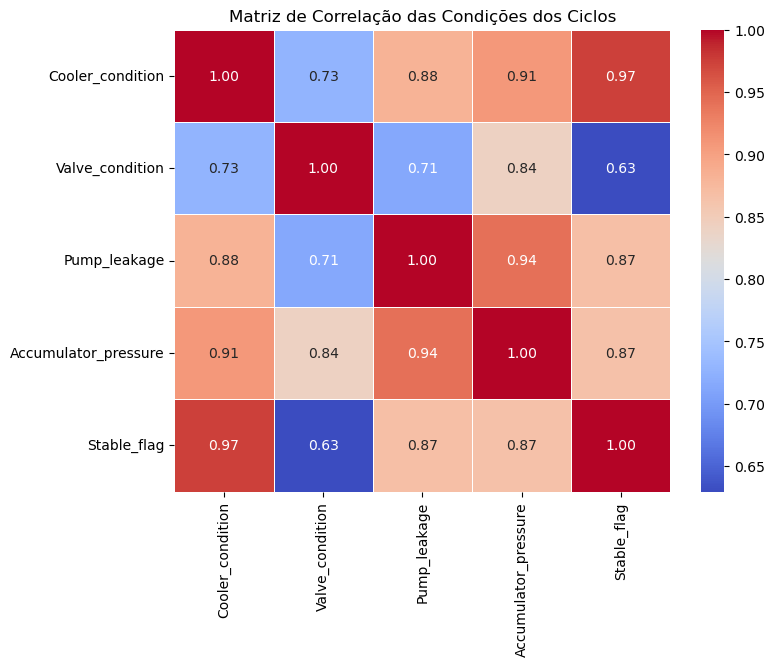

                      Cooler_condition  Valve_condition  Pump_leakage  \
Cooler_condition              1.000000         0.727132      0.881436   
Valve_condition               0.727132         1.000000      0.713926   
Pump_leakage                  0.881436         0.713926      1.000000   
Accumulator_pressure          0.908767         0.841813      0.941715   
Stable_flag                   0.974573         0.629433      0.867617   

                      Accumulator_pressure  Stable_flag  
Cooler_condition                  0.908767     0.974573  
Valve_condition                   0.841813     0.629433  
Pump_leakage                      0.941715     0.867617  
Accumulator_pressure              1.000000     0.865320  
Stable_flag                       0.865320     1.000000  


In [16]:
# Criar DataFrame com os dados das condições dos ciclos
data = {
    "Cooler_condition": [3] * 732 + [20] * 732 + [100] * 741,
    "Valve_condition": [73] * 360 + [80] * 360 + [90] * 360 + [100] * 1125,
    "Pump_leakage": [0] * 1221 + [1] * 492 + [2] * 492,
    "Accumulator_pressure": [90] * 808 + [100] * 399 + [115] * 399 + [130] * 599,
    "Stable_flag": [0] * 1449 + [1] * 756
}

df = pd.DataFrame(data)

# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Criar um heatmap para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Condições dos Ciclos")
plt.show()

# Exibir a matriz de correlação
print(correlation_matrix)

1.	Cooler_condition e Stable_flag (0.97)
    - Alta correlação positiva → Quanto mais eficiente o cooler, maior a estabilidade das condições do sistema.
2.	Accumulator_pressure e Pump_leakage (0.94)
    - Relação forte → Quanto maior a pressão do acumulador, maior o risco de vazamento interno da bomba. Isso pode indicar uma relação direta entre a deterioração do sistema e a perda de pressão.
3.	Cooler_condition e Accumulator_pressure (0.91)
    - Relação direta → Sistemas com melhor condição do cooler tendem a manter uma pressão mais alta no acumulador.
4.	Valve_condition e Accumulator_pressure (0.84)
    - Correlação positiva → A pressão do acumulador também influencia o comportamento das válvulas.
5.	Stable_flag e Accumulator_pressure (0.86)
    - Sistemas mais estáveis tendem a manter uma pressão maior no acumulador.
6.	Cooler_condition e Pump_leakage (0.88)
    - Forte correlação → O estado do cooler está diretamente relacionado à condição de vazamento da bomba, sugerindo que o resfriamento inadequado pode contribuir para vazamentos.
7.	Valve_condition e Stable_flag (0.62)
    - Correlação mais fraca, mas ainda relevante → Pequenos atrasos nas válvulas podem impactar a estabilidade do sistema.
  
As correlações sugerem que a degradação de um componente pode afetar outros, reforçando a necessidade de monitoramento conjunto dos indicadores.
O Cooler_condition é um fator crítico, pois impacta diretamente a estabilidade e outros componentes do sistema.
O Pump_leakage e Accumulator_pressure têm uma relação forte, o que pode indicar um padrão de degradação progressiva.
